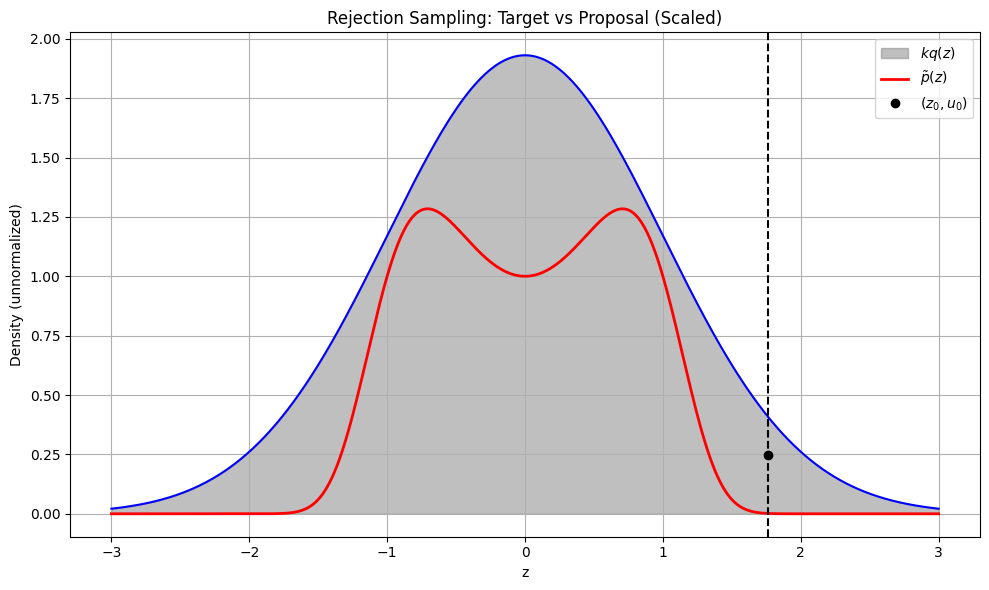

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# === 目標分布（非標準的雙峰分布）===
def unnormalized_target(z):
    return np.exp(-z**4 + z**2)

# === Proposal 分布（標準常態）===
def proposal(z):
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

# === 包覆常數 M，使得 M * q(z) >= p(z) for all z in range ===
z_range = np.linspace(-3, 3, 1000)
target_vals = unnormalized_target(z_range)
proposal_vals = proposal(z_range)
M = np.max(target_vals / proposal_vals) * 1.1  # 增加一點 buffer

# === Rejection Sampling ===
n_samples = 5000
z_samples = []
u0_z0_pair = None  # 儲存一組樣本點來畫圖

np.random.seed(0)
while len(z_samples) < n_samples:
    z0 = np.random.normal()
    u0 = np.random.uniform(0, M * proposal(z0))
    if u0 < unnormalized_target(z0):
        z_samples.append(z0)
    if u0_z0_pair is None:
        u0_z0_pair = (z0, u0)  # 儲存第一個點做示意圖

z_samples = np.array(z_samples)

# === 可視化 ===
plt.figure(figsize=(10, 6))
# 包覆的 proposal 分布 (kq)
plt.fill_between(z_range, M * proposal_vals, color='gray', alpha=0.5, label=r'$kq(z)$')
# 目標分布
plt.plot(z_range, unnormalized_target(z_range), 'r-', lw=2, label=r'$\tilde{p}(z)$')
# proposal 分布的外框線
plt.plot(z_range, M * proposal_vals, 'b-', lw=1.5)
# 單一樣本點 (z0, u0)
plt.axvline(u0_z0_pair[0], color='k', linestyle='--')
plt.plot(u0_z0_pair[0], u0_z0_pair[1], 'ko', label=r'$(z_0, u_0)$')

# 圖面標註與格式
plt.title("Rejection Sampling: Target vs Proposal (Scaled)")
plt.xlabel("z")
plt.ylabel("Density (unnormalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()